In [1]:
import requests
from bs4 import BeautifulSoup

def get_product_urls(category_url, headers):
    try:
        response = requests.get(category_url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        product_elements = soup.find_all('a', class_='a-link-normal s-no-outline')
        product_urls = ['https://www.amazon.com' + elem['href'] for elem in product_elements]
        return product_urls
    except requests.exceptions.RequestException as e:
        print(f"Error fetching category page: {e}")
        return []

def get_product_info(url, headers):
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the product title
        product_title_element = soup.find('span', id='productTitle')
        
        # Find the product rating
        product_rating_element = soup.find('span', class_='a-icon-alt')
        
        # Find the number of reviews
        product_reviews_element = soup.find('span', id='acrCustomerReviewText')
        
        product_title = product_title_element.text.strip() if product_title_element else 'Not Available'
        product_rating = product_rating_element.text.split(' ')[0] if product_rating_element else 'Not Available'
        product_reviews = product_reviews_element.text.strip() if product_reviews_element else 'Not Available'

        product_info = {
            'Product Title': product_title,
            'Product Rating': product_rating,
            'Number of Reviews': product_reviews
        }
        return product_info
    except requests.exceptions.RequestException as e:
        print(f"Error fetching page: {e}")
        return None

def scrape_product_info():
    category_url = 'https://www.amazon.com/s?i=beauty-intl-ship&bbn=16225006011&rh=n%3A11060451%2Cn%3A3760911&dc&qid=1597929223&rnid=11060451&ref=sr_nr_n_5'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Connection': 'keep-alive',
    }
    
    product_urls = get_product_urls(category_url, headers)
    if not product_urls:
        print("Failed to fetch product URLs.")
        return

    all_product_data = []

    for product_url in product_urls:
        print(f"Scraping product URL: {product_url}")
        product_data = get_product_info(product_url, headers)
        if product_data:
            all_product_data.append(product_data)
    
    if all_product_data:
        print("Scraping complete. Here is the product information:")
        for product in all_product_data:
            print(product)
    else:
        print("No data scraped.")

if __name__ == '__main__':
    scrape_product_info()


Scraping product URL: https://www.amazon.com/sspa/click?ie=UTF8&spc=MToxOTU3MDA4NTIyNjczODcyOjE3MTk5Mzg2NTk6c3BfYXRmX2Jyb3dzZTozMDAyNTA0NzIxMDA4MDI6OjA6Og&url=%2FFacial-Steamer-Personal-Professional-Cleaning%2Fdp%2FB0CT8SJVXW%2Fref%3Dsr_1_1_sspa%3Fqid%3D1719938659%26rnid%3D11060451%26s%3Dbeauty-intl-ship%26sr%3D1-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfYnJvd3Nl%26psc%3D1
Scraping product URL: https://www.amazon.com/sspa/click?ie=UTF8&spc=MToxOTU3MDA4NTIyNjczODcyOjE3MTk5Mzg2NTk6c3BfYXRmX2Jyb3dzZTozMDAxNjEyNTQ5MTYzMDI6OjA6Og&url=%2FJEMZ-Teeth-Whitening-Treatment-Kit%2Fdp%2FB08SR7WNDW%2Fref%3Dsr_1_2_sspa%3Fqid%3D1719938659%26rnid%3D11060451%26s%3Dbeauty-intl-ship%26sr%3D1-2-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfYnJvd3Nl%26psc%3D1
Scraping product URL: https://www.amazon.com/sspa/click?ie=UTF8&spc=MToxOTU3MDA4NTIyNjczODcyOjE3MTk5Mzg2NTk6c3BfYXRmX2Jyb3dzZTozMDAyMzI0NTE2MjgzMDI6OjA6Og&url=%2FELEMIS-Pro-Collagen-Marine-Cream-SPF%2Fdp%2FB07BMBQG73%2Fref%3Dsr_1_3_sspa%3Fqid%3D1719938659%2

### The above code requests to the give a url of Amazon beauty products and scrap the products data to give the scraped data as output

### Then the Scraped data is stored in.csv file and performed exploratory data analysis to visualize it

                                            Product Title Product Rating  \
count                                                   9              9   
unique                                                  9              7   
top     Nano Facial Steamer,Ionic Face Steamer for Per...            4.7   
freq                                                    1              2   

       Number of Reviews  
count                  9  
unique                 9  
top           17 ratings  
freq                   1  


C:\Users\amrut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


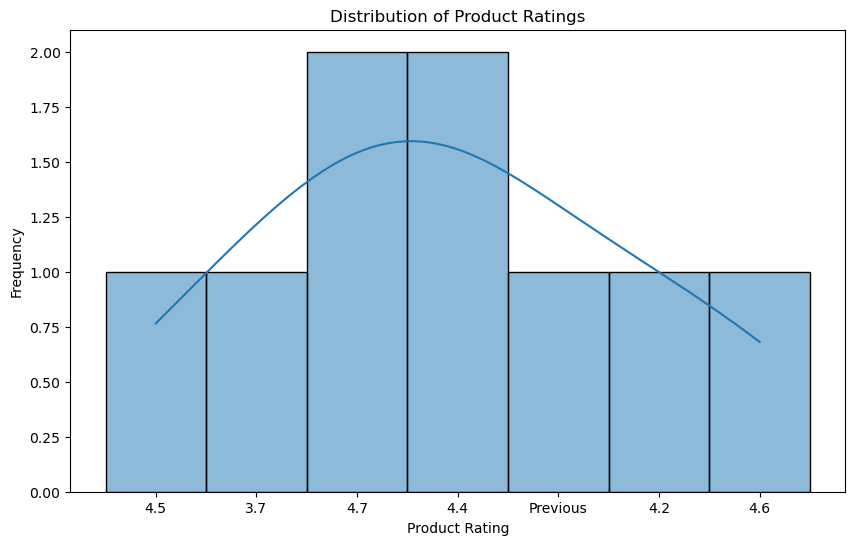

C:\Users\amrut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


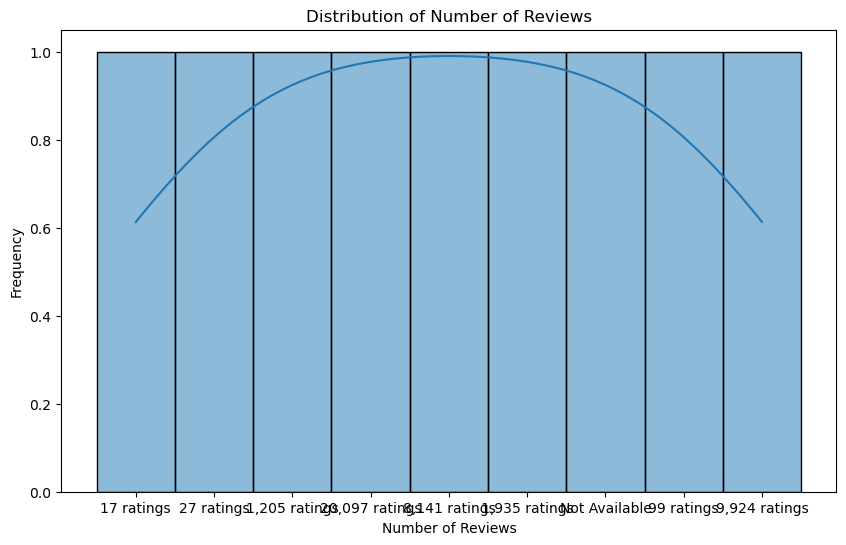

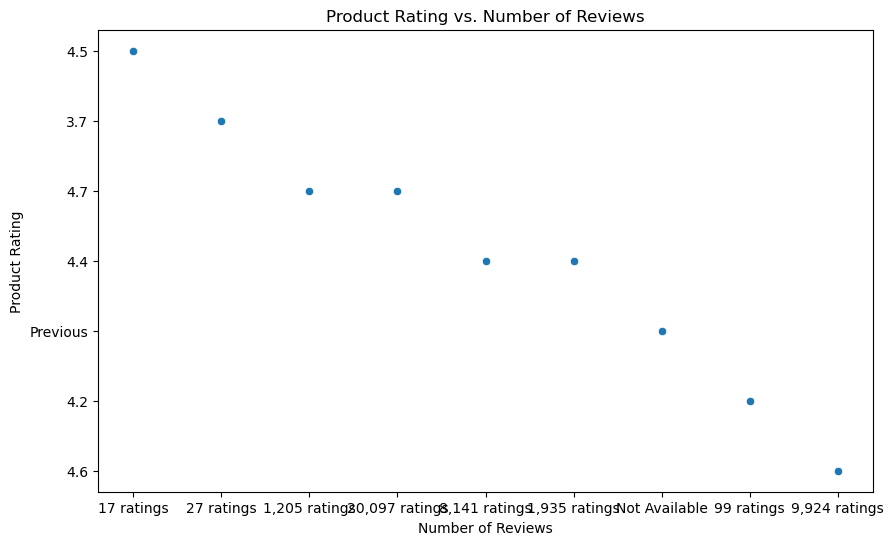

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have scraped data and stored it in a DataFrame
df = pd.DataFrame([
    {'Product Title': 'Nano Facial Steamer,Ionic Face Steamer for Personal Skin Care at Home or Salon, Spa, Professional Nano Ionic Facial Steamer for Deep Cleaning', 'Product Rating': '4.5', 'Number of Reviews': '17 ratings'},
    {'Product Title': 'Jemz Smile Chewable Teeth Whitening Kit - 16 Treatments, Teeth Whitening Gum for Sensitive Teeth Enamel, Tooth Whitening Without Sensitivity', 'Product Rating': '3.7', 'Number of Reviews': '27 ratings'},
    {'Product Title': 'ELEMIS Pro-Collagen Marine Cream SPF 30, Lightweight Anti-Wrinkle Daily Face Moisturizer Firms, Smoothes, Hydrates, & Delivers Sun Protection', 'Product Rating': '4.7', 'Number of Reviews': '1,205 ratings'},
    {'Product Title': 'Gillette Mens Razor Blade Refills, 10 Fusion5 Cartridges, 2 ProGlide Cartridges, Lubrastrip for a More Comfortable Shave 12 Count(Pack of 1)', 'Product Rating': '4.7', 'Number of Reviews': '20,097 ratings'},
    {'Product Title': 'MANSPOT Manscape Groin & Body Hair Trimmer for Men, Electric Ball Trimmer Pubic Trimmer Body Shaver, Replaceable Ceramic Blade Heads,Waterproof Wet/Dry Body Shaver Groomer,90 Minutes Shaving', 'Product Rating': '4.4', 'Number of Reviews': '8,141 ratings'},
    {'Product Title': 'Small Scissors, Eyebrow Scissors, Nose Hair Scissors Round Tip Design, Will Not Hurt the Nasal Cavity. Professional Grooming Scissors for Hair, Eyelashes, Nose, Eyebrow Trimming, Mustache. - AsonTao', 'Product Rating': '4.4', 'Number of Reviews': '1,935 ratings'},
    {'Product Title': 'Mini Balsam Fir Lozenges Breath Freshner', 'Product Rating': 'Previous', 'Number of Reviews': 'Not Available'},
    {'Product Title': '3 in 1 Diamond Microdermabrasion Machine, Professional Microdermabrasion Device with Vacuum Spray, Beauty Facial Skin Care Dermabrasion Equipment for Salon Personal Home Use', 'Product Rating': '4.2', 'Number of Reviews': '99 ratings'},
    {'Product Title': 'DOVE MEN + CARE Fortifying 2-in-1 Shampoo and Conditioner Fresh and Clean with Caffeine 4 Count For Everyday Care Helps Strengthen and Nourish Hair 12 oz', 'Product Rating': '4.6', 'Number of Reviews': '9,924 ratings'}
])


# Save the DataFrame to a CSV file
df.to_csv('scraped_data.csv', index=False)

# EDA
print(df.describe())

# Distribution of Product Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Product Rating'], bins=10, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Product Rating')
plt.ylabel('Frequency')
plt.show()

# Distribution of Number of Reviews
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of Reviews'], bins=10, kde=True)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot of Ratings vs. Number of Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of Reviews', y='Product Rating', data=df)
plt.title('Product Rating vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Rating')
plt.show()


### From the above scraped beauty products we have taken one of the product that is MANSPOT Manscape Groin & Body Hair Trimmer for Men and scraped the reviews of that product

In [91]:
# installing libraries
from bs4 import BeautifulSoup as bs
import requests

In [93]:
# link of the product
link = 'https://www.amazon.com/MANSPOT-Trimmer-Electric-Replaceable-Waterproof/dp/B09HZTKLNP/ref=sr_1_6_sspa?qid=1720271365&rnid=11060451&s=beauty-intl-ship&sr=1-6-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9tdGZfYnJvd3Nl&th=1'

In [95]:
#get the response from the site page
page = requests.get(link)

In [96]:
page

<Response [200]>

b'<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function()
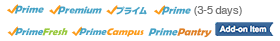

In [99]:
# content of the site page of a particular product
page.content

In [101]:
# For better understanding and formatting
soup = bs(page.content,'html.parser')

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:csm:head-open-part1 -->
  <script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
  <!-- sp:end-feature:csm:head-open-part1 -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:end-feature:cs-optimization -->
  <!-- sp:feature:csm:head-open-part2 -->
  <script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{
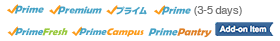

In [102]:
#The prettify() method will turn a Beautiful Soup parse tree into a nicely formatted Unicode string, with a separate line for each tag and each string
print(soup.prettify())

In [105]:
#to find all HTML elements that are <span> tags with the class a-profile-name. This line of code will return a list of these elements.
names = soup.find_all('span',class_='a-profile-name')

In [107]:
names

[<span class="a-profile-name">MANSPOT Manscape Body and Groin Hair Trimmer for Men Women</span>,
 <span class="a-profile-name"></span>,
 <span class="a-profile-name"></span>,
 <span class="a-profile-name"></span>,
 <span class="a-profile-name"></span>,
 <span class="a-profile-name"></span>,
 <span class="a-profile-name"></span>,
 <span class="a-profile-name"></span>,
 <span class="a-profile-name"></span>,
 <span class="a-profile-name"></span>,
 <span class="a-profile-name"></span>,
 <span class="a-profile-name">Amazon Customer</span>,
 <span class="a-profile-name">Amazon Customer</span>,
 <span class="a-profile-name">Amazon Customer</span>,
 <span class="a-profile-name">Mike Richardson</span>,
 <span class="a-profile-name">Mike Richardson</span>,
 <span class="a-profile-name">Matt</span>,
 <span class="a-profile-name">Chuck</span>,
 <span class="a-profile-name">John</span>,
 <span class="a-profile-name">Emil</span>,
 <span class="a-profile-name">Looch</span>,
 <span class="a-profile-na

In [109]:
# Gives a list of customer names with list comprehension
cust_name = []
for i in range(0,len(names)):
    cust_name.append(names[i].get_text())
cust_name

['MANSPOT Manscape Body and Groin Hair Trimmer for Men Women',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Amazon Customer',
 'Amazon Customer',
 'Amazon Customer',
 'Mike Richardson',
 'Mike Richardson',
 'Matt',
 'Chuck',
 'John',
 'Emil',
 'Looch',
 'darious',
 'Emmanuel']

In [111]:
# Data Cleaning
cust_name.pop(0)

'MANSPOT Manscape Body and Groin Hair Trimmer for Men Women'

In [113]:
cust_name

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Amazon Customer',
 'Amazon Customer',
 'Amazon Customer',
 'Mike Richardson',
 'Mike Richardson',
 'Matt',
 'Chuck',
 'John',
 'Emil',
 'Looch',
 'darious',
 'Emmanuel']

In [115]:
cust_name.pop(0)

''

In [117]:
cust_name.pop(0)

''

In [119]:
cust_name.pop(0)

''

In [121]:
cust_name.pop(0)

''

In [123]:
cust_name.pop(0)

''

In [125]:
cust_name.pop(0)

''

In [127]:
cust_name.pop(0)

''

In [129]:
cust_name

['',
 '',
 '',
 'Amazon Customer',
 'Amazon Customer',
 'Amazon Customer',
 'Mike Richardson',
 'Mike Richardson',
 'Matt',
 'Chuck',
 'John',
 'Emil',
 'Looch',
 'darious',
 'Emmanuel']

In [131]:
cust_name.pop(0)

''

In [133]:
cust_name.pop(0)

''

In [135]:
cust_name.pop(0)

''

In [137]:
cust_name.pop(0)

'Amazon Customer'

In [139]:
cust_name

['Amazon Customer',
 'Amazon Customer',
 'Mike Richardson',
 'Mike Richardson',
 'Matt',
 'Chuck',
 'John',
 'Emil',
 'Looch',
 'darious',
 'Emmanuel']

In [141]:
cust_name.pop(1)

'Amazon Customer'

In [89]:
cust_name

['Amazon Customer',
 'Mike Richardson',
 'Mike Richardson',
 'Matt',
 'John',
 'Emil',
 'Looch',
 'darious',
 'Emmanuel']

In [143]:
cust_name.pop(0)

'Amazon Customer'

In [145]:
cust_name

['Mike Richardson',
 'Mike Richardson',
 'Matt',
 'Chuck',
 'John',
 'Emil',
 'Looch',
 'darious',
 'Emmanuel']

In [155]:
cust_name.pop(0)

'Mike Richardson'

In [157]:
cust_name

['Mike Richardson',
 'Matt',
 'Chuck',
 'John',
 'Emil',
 'Looch',
 'darious',
 'Emmanuel']

In [147]:
#extracts the text content of these elements and store them in a list
title = soup.find_all('a',class_='review-title-content')

In [149]:
title

[<a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R1ES4G312HPJXT?ASIN=B09HZTKLNP"><i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i><span class="a-letter-space"></span>
 <span>High quality trimmer</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/REOP7R7C0PR6N?ASIN=B09HZTKLNP"><i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i><span class="a-letter-space"></span>
 <span>That water proofing is key.</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/RAD34WDL4M0VS?ASIN=B09HZTKLNP"><i class="a-icon a

In [151]:
# Gives the list of review title
review_title = []
for i in range(0,len(title)):
    review_title.append(title[i].get_text())
review_title

['5.0 out of 5 stars\nHigh quality trimmer\n',
 '5.0 out of 5 stars\nThat water proofing is key.\n',
 '4.0 out of 5 stars\nQuiet\n',
 '5.0 out of 5 stars\nEasy to use. Ergonomically friendly. Very functional!\n',
 '5.0 out of 5 stars\nTakes some practice, but I like it\n',
 '5.0 out of 5 stars\nRecommend!\n',
 '3.0 out of 5 stars\nIt does nick\n',
 '3.0 out of 5 stars\nEhhhhh not bad but\n']

In [153]:
#removes leading newline characters ('\n') from each review title in the review_title list
review_title[:] = [titles.lstrip('\n') for titles in review_title]
review_title

['5.0 out of 5 stars\nHigh quality trimmer\n',
 '5.0 out of 5 stars\nThat water proofing is key.\n',
 '4.0 out of 5 stars\nQuiet\n',
 '5.0 out of 5 stars\nEasy to use. Ergonomically friendly. Very functional!\n',
 '5.0 out of 5 stars\nTakes some practice, but I like it\n',
 '5.0 out of 5 stars\nRecommend!\n',
 '3.0 out of 5 stars\nIt does nick\n',
 '3.0 out of 5 stars\nEhhhhh not bad but\n']

In [159]:
review_title[:] = [titles.rstrip('\n') for titles in review_title]
review_title

['5.0 out of 5 stars\nHigh quality trimmer',
 '5.0 out of 5 stars\nThat water proofing is key.',
 '4.0 out of 5 stars\nQuiet',
 '5.0 out of 5 stars\nEasy to use. Ergonomically friendly. Very functional!',
 '5.0 out of 5 stars\nTakes some practice, but I like it',
 '5.0 out of 5 stars\nRecommend!',
 '3.0 out of 5 stars\nIt does nick',
 '3.0 out of 5 stars\nEhhhhh not bad but']

In [161]:
# gives a list of review ratings
rating = soup.find_all('i',class_='review-rating')
rating

[<i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">4.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-3 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">3.0 out of 5 stars</span></i>,
 <i class="a-

In [163]:
rate = []
for i in range(0,len(rating)):
    rate.append(rating[i].get_text())
rate

['5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '5.0 out of 5 stars']

In [165]:
len(rate)

9

In [167]:
rate.pop(0)

'5.0 out of 5 stars'

In [169]:
rate

['5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '5.0 out of 5 stars']

In [171]:
#finds all HTML elements that are <span> tags with the attribute data-hook="review-body"
review = soup.find_all("span",{"data-hook":"review-body"})
review

[<span class="a-size-base review-text" data-hook="review-body"><div class="a-expander-collapsed-height a-row a-expander-container a-expander-partial-collapse-container" data-a-expander-collapsed-height="300" data-a-expander-name="review_text_read_more" style="max-height:300px"><div class="a-expander-content reviewText review-text-content a-expander-partial-collapse-content" data-expanded="false" data-hook="review-collapsed">
 <span>Very nice and easy to handle. Battery has a very long life. Super easy to clean and perfect for sensitive skin.</span>
 </div><div class="a-expander-header a-expander-partial-collapse-header"><div class="a-expander-content-fade"></div><a aria-expanded="false" aria-label="Toggle full review text" class="a-declarative" data-a-expander-toggle='{"allowLinkDefault":true, "expand_prompt":"Read more", "collapse_prompt":"Read less"}' data-action="a-expander-toggle" data-csa-c-func-deps="aui-da-a-expander-toggle" data-csa-c-type="widget" data-csa-interaction-events="

In [173]:
#gives a list of review content
review_content = []
for i in range(0,len(review)):
    review_content.append(review[i].get_text())
review_content

['\nVery nice and easy to handle. Battery has a very long life. Super easy to clean and perfect for sensitive skin.\nRead more',
 "\n\n\n\n\n                    The media could not be loaded.\n                \n\n\n\n\xa0The Manspot Trimmer is an excellent grooming tool that strikes a balance between performance and convenience. One of its standout features is the impressive battery life, which allows for multiple trimming sessions on a single charge, making it perfect for those with a busy lifestyle.In terms of ease of use, the Manspot Trimmer excels. Its ergonomic design ensures a comfortable grip, and the intuitive controls make it easy to switch between different lengths and settings. The trimmer is also lightweight, which adds to the overall comfort during use.Cleaning the Manspot Trimmer is a breeze. The detachable blade head can be rinsed under water, and the included brush helps remove any remaining hair, ensuring the trimmer is hygienic and ready for the next use.While the Man

In [175]:
#removes leading newline characters ('\n') from each review content in the review_content list
review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
review_content

['Very nice and easy to handle. Battery has a very long life. Super easy to clean and perfect for sensitive skin.\nRead more',
 "                    The media could not be loaded.\n                \n\n\n\n\xa0The Manspot Trimmer is an excellent grooming tool that strikes a balance between performance and convenience. One of its standout features is the impressive battery life, which allows for multiple trimming sessions on a single charge, making it perfect for those with a busy lifestyle.In terms of ease of use, the Manspot Trimmer excels. Its ergonomic design ensures a comfortable grip, and the intuitive controls make it easy to switch between different lengths and settings. The trimmer is also lightweight, which adds to the overall comfort during use.Cleaning the Manspot Trimmer is a breeze. The detachable blade head can be rinsed under water, and the included brush helps remove any remaining hair, ensuring the trimmer is hygienic and ready for the next use.While the Manspot Trimmer

In [177]:
review_content[:] = [reviews.rstrip('\n') for reviews in review_content]
review_content

['Very nice and easy to handle. Battery has a very long life. Super easy to clean and perfect for sensitive skin.\nRead more',
 "                    The media could not be loaded.\n                \n\n\n\n\xa0The Manspot Trimmer is an excellent grooming tool that strikes a balance between performance and convenience. One of its standout features is the impressive battery life, which allows for multiple trimming sessions on a single charge, making it perfect for those with a busy lifestyle.In terms of ease of use, the Manspot Trimmer excels. Its ergonomic design ensures a comfortable grip, and the intuitive controls make it easy to switch between different lengths and settings. The trimmer is also lightweight, which adds to the overall comfort during use.Cleaning the Manspot Trimmer is a breeze. The detachable blade head can be rinsed under water, and the included brush helps remove any remaining hair, ensuring the trimmer is hygienic and ready for the next use.While the Manspot Trimmer

In [181]:
review_content.pop(0)

'Very nice and easy to handle. Battery has a very long life. Super easy to clean and perfect for sensitive skin.\nRead more'

In [183]:
len(review_content)

8

In [185]:
#To combine all the extracted data into corresponding lists and display them, and to ensure to have the same number of elements in each list

In [187]:
cust_name
review_title
rate
review_content

["                    The media could not be loaded.\n                \n\n\n\n\xa0The Manspot Trimmer is an excellent grooming tool that strikes a balance between performance and convenience. One of its standout features is the impressive battery life, which allows for multiple trimming sessions on a single charge, making it perfect for those with a busy lifestyle.In terms of ease of use, the Manspot Trimmer excels. Its ergonomic design ensures a comfortable grip, and the intuitive controls make it easy to switch between different lengths and settings. The trimmer is also lightweight, which adds to the overall comfort during use.Cleaning the Manspot Trimmer is a breeze. The detachable blade head can be rinsed under water, and the included brush helps remove any remaining hair, ensuring the trimmer is hygienic and ready for the next use.While the Manspot Trimmer won’t give you a razor-close shave, it performs exceptionally well with no guard on, delivering a close trim that’s smooth and

### Sentimental Ananlysis

In [190]:
#To display the DataFrame or manipulate it 

In [192]:
import pandas as pd

In [194]:
df= pd.DataFrame()

In [196]:
df

Empty DataFrame
Columns: []
Index: []

In [198]:
#To add the cust_name list as a new column named "Customer Name" to an existing DataFrame df

In [200]:
df['Customer Name']=cust_name

In [202]:
df

Customer Name
0  Mike Richardson
1             Matt
2            Chuck
3             John
4             Emil
5            Looch
6          darious
7         Emmanuel

In [204]:
#To add the review_title, rate, and review_content lists as new columns to your existing DataFrame df

In [206]:
df['Review title']=review_title
df['Ratings']=rate
df['Reviews']=review_content

In [208]:
df

Customer Name                                       Review title  \
0  Mike Richardson           5.0 out of 5 stars\nHigh quality trimmer   
1             Matt    5.0 out of 5 stars\nThat water proofing is key.   
2            Chuck                          4.0 out of 5 stars\nQuiet   
3             John  5.0 out of 5 stars\nEasy to use. Ergonomically...   
4             Emil  5.0 out of 5 stars\nTakes some practice, but I...   
5            Looch                     5.0 out of 5 stars\nRecommend!   
6          darious                   3.0 out of 5 stars\nIt does nick   
7         Emmanuel             3.0 out of 5 stars\nEhhhhh not bad but   

              Ratings                                            Reviews  
0  5.0 out of 5 stars                      The media could not be loa...  
1  4.0 out of 5 stars  So far I’ve only tried this on my beard, but i...  
2  5.0 out of 5 stars  All I expected and more! Size is important! Ea...  
3  5.0 out of 5 stars  First I'll say that I do like this trimmer ove...  
4  5.0 out of 5 stars  Works exceptionally well. I highly recommend i...  
5  3.0 out of 5 stars  The trimmer works well on certain areas but if...  
6  3.0 out of 5 stars  In my experience I didn't really like the prod...  
7  5.0 out of 5 stars  Muy fácil de usar, recorta muy bien bien mi ba...

In [213]:
# To store the scrapped data in .csv file
df.to_csv(r'C:\Users\ananya\productreviews1.csv',index=True)

In [215]:
#load the data

In [217]:
print(df.describe( ))

          Customer Name                              Review title  \
count                 8                                         8   
unique                8                                         8   
top     Mike Richardson  5.0 out of 5 stars\nHigh quality trimmer   
freq                  1                                         1   

                   Ratings                                            Reviews  
count                    8                                                  8  
unique                   3                                                  8  
top     5.0 out of 5 stars                      The media could not be loa...  
freq                     5                                                  1  


In [219]:
# Filter positive reviews
positive_reviews = df[df['Ratings'].str.contains('4 stars|5 stars')]

# Display the first few rows of positive reviews
positive_reviews.head()

Customer Name                                       Review title  \
0  Mike Richardson           5.0 out of 5 stars\nHigh quality trimmer   
1             Matt    5.0 out of 5 stars\nThat water proofing is key.   
2            Chuck                          4.0 out of 5 stars\nQuiet   
3             John  5.0 out of 5 stars\nEasy to use. Ergonomically...   
4             Emil  5.0 out of 5 stars\nTakes some practice, but I...   

              Ratings                                            Reviews  
0  5.0 out of 5 stars                      The media could not be loa...  
1  4.0 out of 5 stars  So far I’ve only tried this on my beard, but i...  
2  5.0 out of 5 stars  All I expected and more! Size is important! Ea...  
3  5.0 out of 5 stars  First I'll say that I do like this trimmer ove...  
4  5.0 out of 5 stars  Works exceptionally well. I highly recommend i...

In [221]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download the stop words list
nltk.download('stopwords')
nltk.download('punkt')

# Combine all positive reviews into a single text
all_positive_reviews = ' '.join(positive_reviews['Reviews'])

# Tokenize the text
tokens = word_tokenize(all_positive_reviews.lower())

# Remove stop words and punctuation
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Display the first few filtered tokens
print(filtered_tokens[:10])


['media', 'could', 'loaded', 'manspot', 'trimmer', 'excellent', 'grooming', 'tool', 'strikes', 'balance']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ananya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ananya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [222]:
#word count frequency

In [223]:
from collections import Counter

# Count the frequency of each word
word_freq = Counter(filtered_tokens)

# Get the most common words
most_common_words = word_freq.most_common(20)

# Display the most common words
print(most_common_words)


[('trimmer', 18), ('use', 14), ('hair', 10), ('cut', 9), ('read', 8), ('get', 7), ('skin', 7), ('trimming', 6), ('well', 6), ('first', 6), ('like', 6), ('manspot', 5), ('pretty', 5), ('using', 5), ('time', 5), ('one', 4), ('ease', 4), ('guard', 4), ('close', 4), ('even', 4)]


In [227]:
#sentimental analysis

In [229]:
from textblob import TextBlob

# Perform sentiment analysis on the most frequent words
sentiments = {word: TextBlob(word).sentiment.polarity for word, _ in most_common_words}

# Display the sentiments of the most common words
print(sentiments)

{'trimmer': 0.0, 'use': 0.0, 'hair': 0.0, 'cut': 0.0, 'read': 0.0, 'get': 0.0, 'skin': 0.0, 'trimming': 0.0, 'well': 0.0, 'first': 0.25, 'like': 0.0, 'manspot': 0.0, 'pretty': 0.25, 'using': 0.0, 'time': 0.0, 'one': 0.0, 'ease': 0.0, 'guard': 0.0, 'close': 0.0, 'even': 0.0}


In [231]:
# Display the results
print("Most Common Words and Their Frequencies:", most_common_words)
print("Sentiments of the Most Common Words:", sentiments)

Most Common Words and Their Frequencies: [('trimmer', 18), ('use', 14), ('hair', 10), ('cut', 9), ('read', 8), ('get', 7), ('skin', 7), ('trimming', 6), ('well', 6), ('first', 6), ('like', 6), ('manspot', 5), ('pretty', 5), ('using', 5), ('time', 5), ('one', 4), ('ease', 4), ('guard', 4), ('close', 4), ('even', 4)]
Sentiments of the Most Common Words: {'trimmer': 0.0, 'use': 0.0, 'hair': 0.0, 'cut': 0.0, 'read': 0.0, 'get': 0.0, 'skin': 0.0, 'trimming': 0.0, 'well': 0.0, 'first': 0.25, 'like': 0.0, 'manspot': 0.0, 'pretty': 0.25, 'using': 0.0, 'time': 0.0, 'one': 0.0, 'ease': 0.0, 'guard': 0.0, 'close': 0.0, 'even': 0.0}


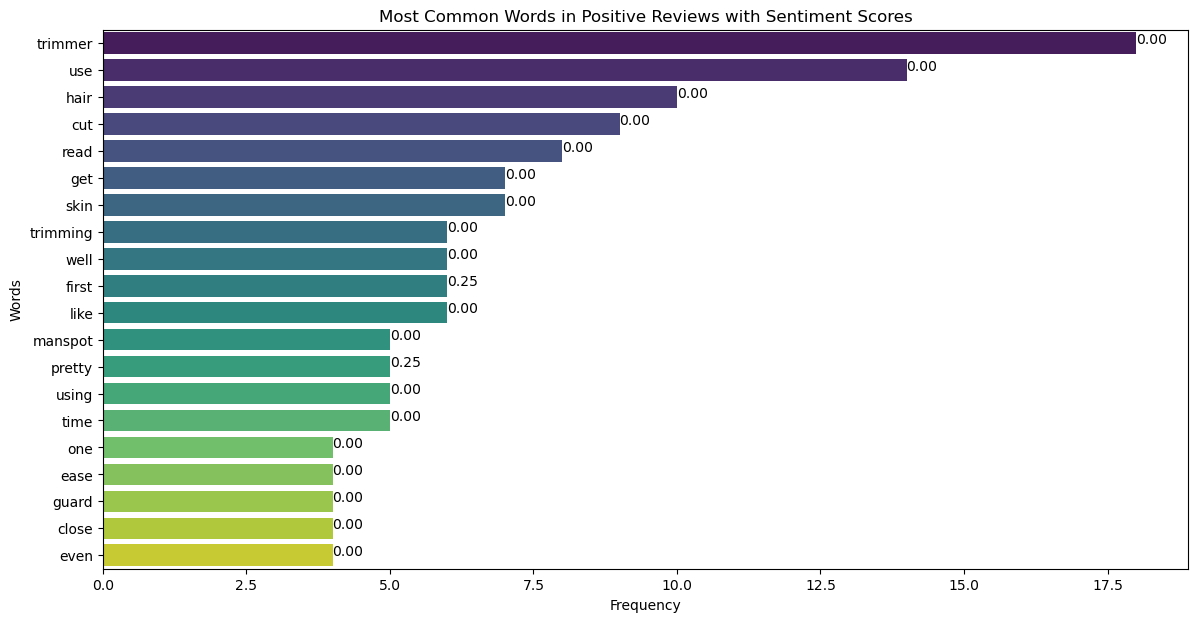

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a DataFrame for plotting
words = [word for word, _ in most_common_words]
frequencies = [freq for _, freq in most_common_words]
polarities = [sentiments[word] for word in words]

df_plot = pd.DataFrame({
    'Word': words,
    'Frequency': frequencies,
    'Sentiment': polarities
})

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x='Frequency', y='Word', data=df_plot, palette='viridis')

# Adding sentiment scores
for index, value in enumerate(df_plot['Frequency']):
    plt.text(value, index, f'{df_plot["Sentiment"][index]:.2f}', color='black', ha="left")

plt.title('Most Common Words in Positive Reviews with Sentiment Scores')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

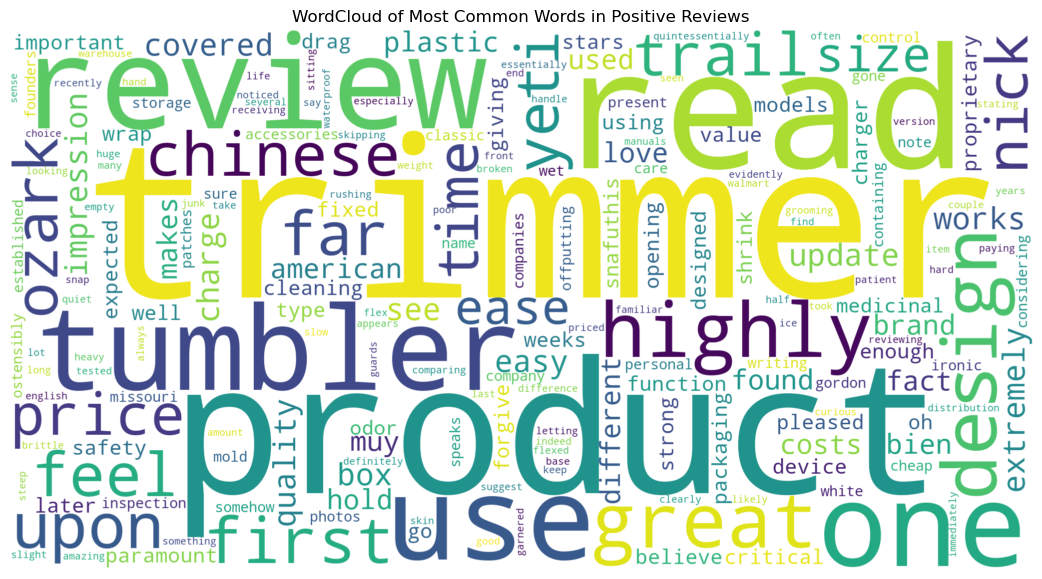

In [188]:
from wordcloud import WordCloud

# Generate WordCloud
text1 = " ".join(word for word in filtered_tokens)
word_cloud1 = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(text1)

# Plot WordCloud
plt.figure(figsize=(14, 7))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Most Common Words in Positive Reviews')
plt.show()